Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [3]:
iris=pd.read_csv("iris.csv")
print(iris)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

Data Exploration

In [4]:
print(iris.shape)

(150, 6)


In [5]:
print(iris.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [6]:
#Checking for null values
print(iris.isna().sum())
print(iris.describe())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [7]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris.head(150)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
iris.tail(100)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
n = len(iris[iris['Species'] == 'Iris-versicolor'])
print("No of Versicolor in Dataset:",n)

No of Versicolor in Dataset: 50


In [11]:
n1 = len(iris[iris['Species'] == 'Iris-virginica'])
print("No of Virginica in Dataset:",n1)

No of Virginica in Dataset: 50


In [12]:
n2 = len(iris[iris['Species'] == 'Iris-setosa'])
print("No of Setosa in Dataset:",n2)

No of Setosa in Dataset: 50


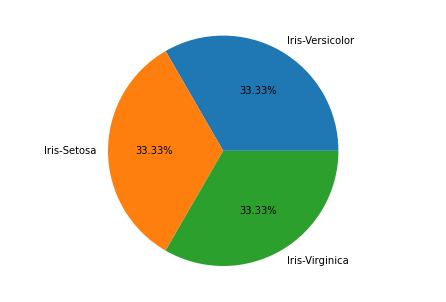

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Iris-Versicolor', 'Iris-Setosa', 'Iris-Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

Id                  AxesSubplot(0.125,0.536818;0.133621x0.343182)
SepalLengthCm    AxesSubplot(0.285345,0.536818;0.133621x0.343182)
SepalWidthCm      AxesSubplot(0.44569,0.536818;0.133621x0.343182)
PetalLengthCm    AxesSubplot(0.606034,0.536818;0.133621x0.343182)
PetalWidthCm     AxesSubplot(0.766379,0.536818;0.133621x0.343182)
dtype: object

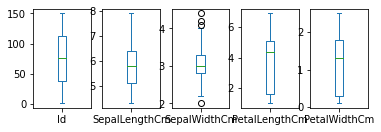

In [14]:
iris.plot(kind ='box',subplots = True, layout =(2,5),sharex = False)

In [15]:
X = iris['SepalLengthCm'].values.reshape(-1,1)
print(X)

[[5.1]
 [4.9]
 [4.7]
 [4.6]
 [5. ]
 [5.4]
 [4.6]
 [5. ]
 [4.4]
 [4.9]
 [5.4]
 [4.8]
 [4.8]
 [4.3]
 [5.8]
 [5.7]
 [5.4]
 [5.1]
 [5.7]
 [5.1]
 [5.4]
 [5.1]
 [4.6]
 [5.1]
 [4.8]
 [5. ]
 [5. ]
 [5.2]
 [5.2]
 [4.7]
 [4.8]
 [5.4]
 [5.2]
 [5.5]
 [4.9]
 [5. ]
 [5.5]
 [4.9]
 [4.4]
 [5.1]
 [5. ]
 [4.5]
 [4.4]
 [5. ]
 [5.1]
 [4.8]
 [5.1]
 [4.6]
 [5.3]
 [5. ]
 [7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]
 [5.7]
 [6.3]
 [4.9]
 [6.6]
 [5.2]
 [5. ]
 [5.9]
 [6. ]
 [6.1]
 [5.6]
 [6.7]
 [5.6]
 [5.8]
 [6.2]
 [5.6]
 [5.9]
 [6.1]
 [6.3]
 [6.1]
 [6.4]
 [6.6]
 [6.8]
 [6.7]
 [6. ]
 [5.7]
 [5.5]
 [5.5]
 [5.8]
 [6. ]
 [5.4]
 [6. ]
 [6.7]
 [6.3]
 [5.6]
 [5.5]
 [5.5]
 [6.1]
 [5.8]
 [5. ]
 [5.6]
 [5.7]
 [5.7]
 [6.2]
 [5.1]
 [5.7]
 [6.3]
 [5.8]
 [7.1]
 [6.3]
 [6.5]
 [7.6]
 [4.9]
 [7.3]
 [6.7]
 [7.2]
 [6.5]
 [6.4]
 [6.8]
 [5.7]
 [5.8]
 [6.4]
 [6.5]
 [7.7]
 [7.7]
 [6. ]
 [6.9]
 [5.6]
 [7.7]
 [6.3]
 [6.7]
 [7.2]
 [6.2]
 [6.1]
 [6.4]
 [7.2]
 [7.4]
 [7.9]
 [6.4]
 [6.3]
 [6.1]
 [7.7]
 [6.3]
 [6.4]
 [6. ]
 [6.9]
 [6.7]
 [6.9]
 [5.8]

In [16]:
Y = iris['SepalWidthCm'].values.reshape(-1,1)
print(Y)

[[3.5]
 [3. ]
 [3.2]
 [3.1]
 [3.6]
 [3.9]
 [3.4]
 [3.4]
 [2.9]
 [3.1]
 [3.7]
 [3.4]
 [3. ]
 [3. ]
 [4. ]
 [4.4]
 [3.9]
 [3.5]
 [3.8]
 [3.8]
 [3.4]
 [3.7]
 [3.6]
 [3.3]
 [3.4]
 [3. ]
 [3.4]
 [3.5]
 [3.4]
 [3.2]
 [3.1]
 [3.4]
 [4.1]
 [4.2]
 [3.1]
 [3.2]
 [3.5]
 [3.1]
 [3. ]
 [3.4]
 [3.5]
 [2.3]
 [3.2]
 [3.5]
 [3.8]
 [3. ]
 [3.8]
 [3.2]
 [3.7]
 [3.3]
 [3.2]
 [3.2]
 [3.1]
 [2.3]
 [2.8]
 [2.8]
 [3.3]
 [2.4]
 [2.9]
 [2.7]
 [2. ]
 [3. ]
 [2.2]
 [2.9]
 [2.9]
 [3.1]
 [3. ]
 [2.7]
 [2.2]
 [2.5]
 [3.2]
 [2.8]
 [2.5]
 [2.8]
 [2.9]
 [3. ]
 [2.8]
 [3. ]
 [2.9]
 [2.6]
 [2.4]
 [2.4]
 [2.7]
 [2.7]
 [3. ]
 [3.4]
 [3.1]
 [2.3]
 [3. ]
 [2.5]
 [2.6]
 [3. ]
 [2.6]
 [2.3]
 [2.7]
 [3. ]
 [2.9]
 [2.9]
 [2.5]
 [2.8]
 [3.3]
 [2.7]
 [3. ]
 [2.9]
 [3. ]
 [3. ]
 [2.5]
 [2.9]
 [2.5]
 [3.6]
 [3.2]
 [2.7]
 [3. ]
 [2.5]
 [2.8]
 [3.2]
 [3. ]
 [3.8]
 [2.6]
 [2.2]
 [3.2]
 [2.8]
 [2.8]
 [2.7]
 [3.3]
 [3.2]
 [2.8]
 [3. ]
 [2.8]
 [3. ]
 [2.8]
 [3.8]
 [2.8]
 [2.8]
 [2.6]
 [3. ]
 [3.4]
 [3.1]
 [3. ]
 [3.1]
 [3.1]
 [3.1]
 [2.7]

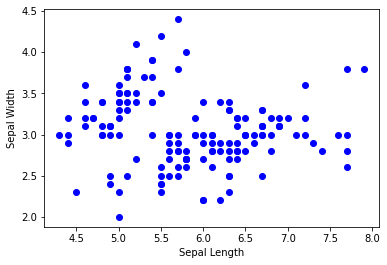

In [17]:
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(X,Y,color='b')
plt.show()

In [18]:
#Correlation 
corr_mat = iris.corr()
print(corr_mat)

                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


TRAINING AND TESTING DATA SPLITTING

In [19]:
train, test = train_test_split(iris, test_size = 0.25)
print(train.shape)
print(test.shape)

(112, 6)
(38, 6)


In [20]:
train_X = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
                 'PetalWidthCm']]
train_y = train.Species

test_X = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
                 'PetalWidthCm']]
test_y = test.Species

In [21]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
23,5.1,3.3,1.7,0.5
80,5.5,2.4,3.8,1.1
26,5.0,3.4,1.6,0.4
149,5.9,3.0,5.1,1.8
77,6.7,3.0,5.0,1.7


In [22]:
test_y.head()

106     Iris-virginica
94     Iris-versicolor
55     Iris-versicolor
134     Iris-virginica
91     Iris-versicolor
Name: Species, dtype: object

In [23]:
test_y.head()

106     Iris-virginica
94     Iris-versicolor
55     Iris-versicolor
134     Iris-virginica
91     Iris-versicolor
Name: Species, dtype: object

Using LogisticRegression

In [24]:
#Using LogisticRegression
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('Accuracy:',metrics.accuracy_score(prediction,test_y))
as1= metrics.accuracy_score(prediction,test_y)

Accuracy: 0.8947368421052632


In [25]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_mat = confusion_matrix(test_y,prediction)
print("Confusion matrix: \n",confusion_mat)
print(classification_report(test_y,prediction))

Confusion matrix: 
 [[10  0  0]
 [ 0 13  2]
 [ 0  2 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.87      0.87      0.87        15
 Iris-virginica       0.85      0.85      0.85        13

       accuracy                           0.89        38
      macro avg       0.90      0.90      0.90        38
   weighted avg       0.89      0.89      0.89        38



Using Support Vector Machines

In [26]:
from sklearn.svm import SVC
model1 = SVC()
model1.fit(train_X,train_y)

pred_y = model1.predict(test_X)

as2=accuracy_score(test_y,pred_y)
print("Acc=",as2)

Acc= 0.8947368421052632


Using KNN 

In [27]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(train_X,train_y)

y_pred2 = model2.predict(test_X)

as3=accuracy_score(test_y,y_pred2)
print("Accuracy Score:",as3)

Accuracy Score: 0.9210526315789473


Using Gaussian Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(train_X,train_y)

y_pred3 = model3.predict(test_X)

as4 = accuracy_score(test_y,y_pred3)
print("Accuracy Score:",as4)

Accuracy Score: 0.8947368421052632


Using Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(train_X,train_y)

y_pred4 = model4.predict(test_X)

as5 = accuracy_score(test_y,y_pred4)
print("Accuracy Score:",as5)

Accuracy Score: 0.8947368421052632


In [30]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'Naive Bayes','KNN' ,'Decision Tree'],
    'Score': [as1,as2,as4,as3,as5]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.921053,KNN
0.894737,Logistic Regression
0.894737,Support Vector Machines
0.894737,Naive Bayes
0.894737,Decision Tree


#CONCLUSION

As KNN is giving us the highest accuracy, We can use KNN algorithm for training this model.